In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
# Получить статистику по дням. 
# Просто посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.
# Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?

# Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех просмотров объявления к кликам. Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. Различается ли средний и медианный CTR объявлений в наших данных?

# Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! 
# Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?

# Есть ли различия в CTR у объявлений с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

# Для финансового отчета нужно рассчитать наш заработок по дням. В какой день мы заработали больше всего? В какой меньше? Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, и мы списываем деньги за каждый показ CPM объявления, если у CPM объявления цена - 200 рублей, то за один показ мы зарабатываем 200 / 1000.
# Какая платформа самая популярная для размещения рекламных объявлений? Сколько процентов показов приходится на каждую из платформ (колонка platform)?

# А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

In [3]:
ads_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-kazantseva-40/shared/ads_data.csv.zip', compression='zip')

In [ ]:
# Here type of compression is zip
# ads_data = pd.read_csv('ads_data.csv.zip', compression='zip')

In [4]:
ads_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29


In [5]:
ads_data['full_date'] = pd.to_datetime(ads_data.time, unit='s')

In [ ]:
# Время может быть указано в разном формате, один из них — число секунд, прошедших с 1970 года.

In [6]:
ads_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793,2019-04-01 00:00:48
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041,2019-04-01 16:24:26
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41,2019-04-01 16:24:26
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898,2019-04-01 16:24:26
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29,2019-04-01 16:24:26


In [7]:
ads_data.shape

(3176714, 13)

In [8]:
ads_data.dtypes

ad_id                             int64
time                              int64
event                            object
date                             object
ad_cost_type                     object
has_video                         int64
client_union_id                   int64
campaign_union_id                 int64
platform                         object
ad_cost                         float64
target_audience_count             int64
user_id                           int64
full_date                datetime64[ns]
dtype: object

In [9]:
ads_data['date'] = pd.to_datetime(ads_data.date)

In [ ]:
'''
dt.microsecond — сколько микросекунд в указанном времени 
(то есть, если время 5 минут, 0 секунд и 3 микросекунды, то он вернёт 3, а не 5 * 60 * 106)

dt.second

dt.minute

dt.hour

dt.day - день месяца

dt.weekday - Номер дня в недели

dt.day_name() - Имя дня в недели

dt.week - Номер недели в годy

dt.month - Номер месяца

dt.month_name() - Название месяца

dt.year

dt.daysinmonth - Число дней в текущем месяце

dt.components - Все единицы измерения времени можно извлечь сразу с помощью атрибута components

Timedelta — это тип данных, 
соответствующий разнице двух времён, то есть, какая-то продолжительность времени.
'''

In [10]:
ads_data.dtypes

ad_id                             int64
time                              int64
event                            object
date                     datetime64[ns]
ad_cost_type                     object
has_video                         int64
client_union_id                   int64
campaign_union_id                 int64
platform                         object
ad_cost                         float64
target_audience_count             int64
user_id                           int64
full_date                datetime64[ns]
dtype: object

In [11]:
ads_data.full_date.dt.date

0          2019-04-01
1          2019-04-01
2          2019-04-01
3          2019-04-01
4          2019-04-01
              ...    
3176709    2019-04-05
3176710    2019-04-05
3176711    2019-04-05
3176712    2019-04-05
3176713    2019-04-05
Name: full_date, Length: 3176714, dtype: object

In [12]:
# Получить статистику по дням. 
# Просто посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.
# Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?


In [13]:
ads_data.groupby('date') \
    .agg({'ad_id': 'count'})

,ad_id
date,
2019-04-01,35567
2019-04-02,147329
2019-04-03,216529
2019-04-04,127699
2019-04-05,2284883
2019-04-06,364707


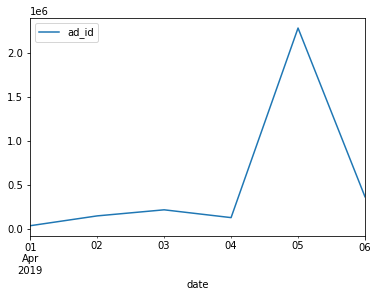

In [14]:
ads_data.groupby('date') \
    .agg({'ad_id': 'count'}).plot()

In [15]:
ads_data.groupby(['date', 'event'], as_index=False) \
    .agg({'ad_id': 'count'})

,date,event,ad_id
0,2019-04-01,click,735
1,2019-04-01,view,34832
2,2019-04-02,click,1518
3,2019-04-02,view,145811
4,2019-04-03,click,1678
5,2019-04-03,view,214851
6,2019-04-04,click,1517
7,2019-04-04,view,126182
8,2019-04-05,click,501595
9,2019-04-05,view,1783288


In [16]:
ads_data.groupby(['date', 'event'], as_index=False) \
    .agg({'ad_id': 'count'}) \
    .pivot(index='date', columns='event', values='ad_id').reset_index()

event,date,click,view
0,2019-04-01,735,34832
1,2019-04-02,1518,145811
2,2019-04-03,1678,214851
3,2019-04-04,1517,126182
4,2019-04-05,501595,1783288
5,2019-04-06,80420,284287


In [17]:
ads_data.groupby(['date'], as_index=False) \
    .agg({'ad_id': pd.Series.nunique})

,date,ad_id
0,2019-04-01,49
1,2019-04-02,146
2,2019-04-03,179
3,2019-04-04,150
4,2019-04-05,131
5,2019-04-06,61


In [18]:
ads_data.groupby(['date'], as_index=False) \
    .agg({'campaign_union_id': pd.Series.nunique})

,date,campaign_union_id
0,2019-04-01,49
1,2019-04-02,146
2,2019-04-03,177
3,2019-04-04,147
4,2019-04-05,130
5,2019-04-06,60


In [19]:
ads_data[ads_data.date == '2019-04-05'] \
    .groupby('ad_id') \
    .agg({'time': 'count'}) \
    .sort_values('time', ascending=False) \
    .head()

,time
ad_id,
112583,2166611
29927,27186
44635,8268
46583,7327
44956,5656


In [20]:
ad_id = 112583

In [21]:
ads_data.query('ad_id == @ad_id')

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
527124,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,web,199.4,239408,4355,2019-04-05 16:10:36
527125,112583,1554480636,click,2019-04-05,CPM,0,111818,112260,android,199.4,239408,6243,2019-04-05 16:10:36
527126,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,android,199.4,239408,2470,2019-04-05 16:10:36
527127,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,web,199.4,239408,5435,2019-04-05 16:10:36
527128,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,android,199.4,239408,6092,2019-04-05 16:10:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176709,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,android,199.4,239408,5467,2019-04-05 21:51:32
3176710,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,android,199.4,239408,2508,2019-04-05 21:51:32
3176711,112583,1554501092,click,2019-04-06,CPM,0,111818,112260,web,199.4,239408,7896,2019-04-05 21:51:32
3176712,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,ios,199.4,239408,4319,2019-04-05 21:51:32


In [22]:
ads_data.query('ad_id == @ad_id') \
    .groupby('date') \
    .agg({'time': 'count'}) \

,time
date,
2019-04-05,2166611
2019-04-06,348613


In [23]:
ads_data.query('ad_id == @ad_id').head(1)


,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
527124,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,web,199.4,239408,4355,2019-04-05 16:10:36


In [24]:
# Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех просмотров объявления к кликам. 
# Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. 
# Различается ли средний и медианный CTR объявлений в наших данных?

In [25]:
ads_data_by_ad = ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index()

In [26]:
ads_data_by_ad.head()

event,ad_id,click,view
0,3,9.0,490.0
1,2132,1.0,95.0
2,2276,2.0,1454.0
3,2475,NaN,132.0
4,2643,3.0,286.0


In [27]:
ads_data_by_ad = ads_data_by_ad.assign(ctr = ads_data_by_ad.click / ads_data_by_ad.view, 
                           ctr_per = 100 * ads_data_by_ad.click / ads_data_by_ad.view)

In [ ]:
'''
Колонки в датафрейме можно также создать с помощью метода assign. 
Он возвращает исходный датафрейм с добавленными колонками — нужно перезадать переменную, 
чтобы изменить датафрейм.

В метод передаются аргументы формата 
название колонки = её содержимое — как название параметра и его значение при вызове функции. 
Здесь название колонок нужно писать без кавычек.

'''

In [28]:
ads_data_by_ad.head()

event,ad_id,click,view,ctr,ctr_per
0,3,9.0,490.0,0.018367,1.836735
1,2132,1.0,95.0,0.010526,1.052632
2,2276,2.0,1454.0,0.001376,0.137552
3,2475,NaN,132.0,NaN,NaN
4,2643,3.0,286.0,0.010490,1.048951


In [29]:
ads_data_by_ad.sort_values('ctr', ascending=False).head(10)

event,ad_id,click,view,ctr,ctr_per
289,112583,580436.0,1934788.0,0.300000,29.999979
324,119450,258.0,1254.0,0.205742,20.574163
125,38575,43.0,257.0,0.167315,16.731518
144,40968,29.0,217.0,0.133641,13.364055
207,45642,42.0,344.0,0.122093,12.209302
283,110924,11.0,95.0,0.115789,11.578947
194,45043,28.0,245.0,0.114286,11.428571
96,35034,112.0,997.0,0.112337,11.233701
5,4585,53.0,476.0,0.111345,11.134454
328,120347,236.0,2168.0,0.108856,10.885609


In [30]:
ads_data_by_ad.ctr.mean()

0.020628096080757954

In [31]:
ads_data_by_ad.ctr.median()

0.010753240746688594

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


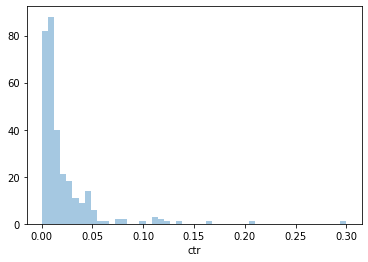

In [32]:
sns.distplot(ads_data_by_ad.ctr, kde=False)

In [33]:
# Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! 
# Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?

In [34]:
ads_data_by_ad = ads_data_by_ad.fillna(0) #Замена пропущенных значений

In [ ]:
'''

loc - позволяющий выбрать поднабор строк и колонок из датафрейма. В некоторых случаях loc удобнее,
но обычно запись с ним более громоздкая и он работает медленнее query

df.loc[df['6'] == 1, '1':'6'] - 
Эта запись отберёт все строки из датафрейма, 
где значения в колонке '6' равны 1, и колонки от '1' до '6'

'''

In [35]:
ads_data_by_ad

event,ad_id,click,view,ctr,ctr_per
0,3,9.0,490.0,0.018367,1.836735
1,2132,1.0,95.0,0.010526,1.052632
2,2276,2.0,1454.0,0.001376,0.137552
3,2475,0.0,132.0,0.000000,0.000000
4,2643,3.0,286.0,0.010490,1.048951
...,...,...,...,...,...
350,121941,1.0,640.0,0.001563,0.156250
351,121943,15.0,1722.0,0.008711,0.871080
352,122042,1.0,155.0,0.006452,0.645161
353,122063,1.0,260.0,0.003846,0.384615


In [36]:
ads_ids_bug1 = ads_data_by_ad.query('click == 0')

In [37]:
ads_ids_bug1.shape

(40, 5)

In [38]:
ads_ids_bug = ads_data_by_ad.query('click == 0').ad_id

In [39]:
ads_data_by_ad[ads_data_by_ad.ad_id.isin(ads_ids_bug)].head()

event,ad_id,click,view,ctr,ctr_per
3,2475,0.0,132.0,0.0,0.0
26,16444,0.0,169.0,0.0,0.0
29,16678,0.0,317.0,0.0,0.0
30,16845,0.0,834.0,0.0,0.0
38,20871,0.0,338.0,0.0,0.0


In [40]:
sum_bug_id = ads_data[ads_data.ad_id.isin(ads_ids_bug)] \
    .groupby('platform', as_index=False) \
    .agg({'ad_id': 'count'}) \
    .sort_values('ad_id')

sum_bug_id

,platform,ad_id
2,web,1988
1,ios,3075
0,android,4906


In [41]:
sum_id = ads_data \
    .groupby('platform', as_index=False) \
    .agg({'ad_id': 'count'}) \
    .sort_values('ad_id')

sum_id

,platform,ad_id
2,web,635425
1,ios,953078
0,android,1588211


In [42]:
df_id = sum_bug_id.merge(sum_id, on='platform').rename(columns={'ad_id_x': 'sum_bug_id', 'ad_id_y': 'total_id'})
df_id

,platform,sum_bug_id,total_id
0,web,1988,635425
1,ios,3075,953078
2,android,4906,1588211


In [43]:
df_id['percent_bug_id'] = (df_id.sum_bug_id / df_id.total_id) * 100
df_id

,platform,sum_bug_id,total_id,percent_bug_id
0,web,1988,635425,0.312861
1,ios,3075,953078,0.322639
2,android,4906,1588211,0.308901


In [44]:
# Есть ли различия в CTR у объявлений с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

In [45]:
df_2019_04_04 =  ads_data[ads_data.date == '2019-04-04'].groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index()

df_2019_04_04

event,ad_id,click,view
0,9071,3.0,352.0
1,9776,37.0,1115.0
2,10601,3.0,848.0
3,11887,151.0,8720.0
4,12137,1.0,170.0
...,...,...,...
145,120790,NaN,19.0
146,121779,68.0,1116.0
147,121790,7.0,701.0
148,121941,NaN,95.0


In [46]:
df_2019_04_04['ctr'] = df_2019_04_04.click / df_2019_04_04.view
df_2019_04_04

event,ad_id,click,view,ctr
0,9071,3.0,352.0,0.008523
1,9776,37.0,1115.0,0.033184
2,10601,3.0,848.0,0.003538
3,11887,151.0,8720.0,0.017317
4,12137,1.0,170.0,0.005882
...,...,...,...,...
145,120790,NaN,19.0,NaN
146,121779,68.0,1116.0,0.060932
147,121790,7.0,701.0,0.009986
148,121941,NaN,95.0,NaN


In [47]:
df_2019_04_04_noNan =  ads_data[ads_data.date == '2019-04-04'].groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() \
    .fillna(0)
df_2019_04_04_noNan

event,ad_id,click,view
0,9071,3.0,352.0
1,9776,37.0,1115.0
2,10601,3.0,848.0
3,11887,151.0,8720.0
4,12137,1.0,170.0
...,...,...,...
145,120790,0.0,19.0
146,121779,68.0,1116.0
147,121790,7.0,701.0
148,121941,0.0,95.0


In [48]:
df_2019_04_04_noNan['ctr'] = df_2019_04_04_noNan.click / df_2019_04_04_noNan.view
df_2019_04_04_noNan

event,ad_id,click,view,ctr
0,9071,3.0,352.0,0.008523
1,9776,37.0,1115.0,0.033184
2,10601,3.0,848.0,0.003538
3,11887,151.0,8720.0,0.017317
4,12137,1.0,170.0,0.005882
...,...,...,...,...
145,120790,0.0,19.0,0.000000
146,121779,68.0,1116.0,0.060932
147,121790,7.0,701.0,0.009986
148,121941,0.0,95.0,0.000000


In [49]:
df_2019_04_04_noNan[df_2019_04_04_noNan.click > 0].ctr.quantile(q=0.95)

0.10211538461538454

In [ ]:
'''
df.quantile(q=[0.95, 0.7]) - список всех желаемых перцентилей


Если ровно по заданному перцентилю в датафрейме нет значения, 
то по умолчанию метод линейно выведет его. 
Поменять это поведение можно с помощью параметра interpolation. 
Вариант 'higher' берёт большую точку из смежных:

df.quantile(q=[0.95, 0.7], interpolation='higher')
'''

In [50]:
# Есть ли различия в CTR у объявлений с видео и без?

In [51]:
ads_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793,2019-04-01 00:00:48
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041,2019-04-01 16:24:26
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41,2019-04-01 16:24:26
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898,2019-04-01 16:24:26
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29,2019-04-01 16:24:26


In [52]:
ads_data.has_video.value_counts()

0    3169550
1       7164
Name: has_video, dtype: int64

In [53]:
ads_video = ads_data.query('has_video == 1')

In [54]:
ads_data_by_ad_video = ads_video.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() \
    .fillna(0)
ads_data_by_ad_video

event,ad_id,click,view
0,29475,9.0,2948.0
1,30692,0.0,409.0
2,31491,4.0,271.0
3,43950,3.0,1746.0
4,44388,3.0,1764.0
5,46363,7.0,0.0


In [ ]:
'''
index — название колонки, значения из которой станут индексами.
columns — название колонки, значения из которой станут колонками.
values — название колонки, значения из которой распределятся по сформированным группам.


pivot_table
Всё как в предыдущем методе, только можно произвести агрегацию, получая одно значение из группы с одинаковыми значениями в новых индексах и колонках. 
По умолчанию берётся среднее от группы значений.

.pivot_table(index='ad_id', columns='event', aggfunc='max')

'''

In [55]:
ads_data_by_ad_video['ctr'] = ads_data_by_ad_video.click / ads_data_by_ad_video.view
ads_data_by_ad_video

event,ad_id,click,view,ctr
0,29475,9.0,2948.0,0.003053
1,30692,0.0,409.0,0.000000
2,31491,4.0,271.0,0.014760
3,43950,3.0,1746.0,0.001718
4,44388,3.0,1764.0,0.001701
5,46363,7.0,0.0,inf


In [56]:
ads_data_by_ad_video.ctr.median()

0.002385565145220477

In [57]:
ads_no_video = ads_data.query('has_video == 0')

In [58]:
ads_data_by_ad_no_video = ads_no_video.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() \
    .fillna(0)
ads_data_by_ad_no_video

event,ad_id,click,view
0,3,9.0,490.0
1,2132,1.0,95.0
2,2276,2.0,1454.0
3,2475,0.0,132.0
4,2643,3.0,286.0
...,...,...,...
344,121941,1.0,640.0
345,121943,15.0,1722.0
346,122042,1.0,155.0
347,122063,1.0,260.0


In [59]:
ads_data_by_ad_no_video['ctr'] = ads_data_by_ad_no_video.click / ads_data_by_ad_no_video.view
ads_data_by_ad_no_video

event,ad_id,click,view,ctr
0,3,9.0,490.0,0.018367
1,2132,1.0,95.0,0.010526
2,2276,2.0,1454.0,0.001376
3,2475,0.0,132.0,0.000000
4,2643,3.0,286.0,0.010490
...,...,...,...,...
344,121941,1.0,640.0,0.001563
345,121943,15.0,1722.0,0.008711
346,122042,1.0,155.0,0.006452
347,122063,1.0,260.0,0.003846


In [60]:
ads_data_by_ad_no_video.ctr.median() # ctr больше для объявлений без видео

0.010050251256281407

In [ ]:
# Для финансового отчета нужно рассчитать наш заработок по дням. 
# В какой день мы заработали больше всего? В какой меньше? 
# Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, 
# и мы списываем деньги за каждый показ CPM объявления, если у 
# CPM объявления цена - 200 рублей, то за один показ мы зарабатываем 200 / 1000.
# Какая платформа самая популярная для размещения рекламных объявлений? 
# Сколько процентов показов приходится на каждую из платформ (колонка platform)?


In [146]:
x = pd.Series([1, 2, 3])

In [143]:
import numpy as np

In [61]:
ads_data_cpc_click = ads_data[(ads_data.ad_cost_type == 'CPC') &  (ads_data.event == 'click')]
ads_data_cpc_click

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
248,4585,1554135960,click,2019-04-01,CPC,0,37,4382,android,53.5,327648,538,2019-04-01 16:26:00
880,120444,1554136218,click,2019-04-01,CPC,0,120413,120440,android,52.0,4667,874,2019-04-01 16:30:18
1011,38110,1554136457,click,2019-04-01,CPC,0,23359,38110,android,54.1,4181,239,2019-04-01 16:34:17
1569,38575,1554133580,click,2019-04-01,CPC,0,23533,38575,android,44.8,21831,1016,2019-04-01 15:46:20
1950,38575,1554134271,click,2019-04-01,CPC,0,23533,38575,ios,44.8,21831,980,2019-04-01 15:57:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919449,19940,1554507113,click,2019-04-06,CPC,0,2016,19939,android,54.9,24781,6614,2019-04-05 23:31:53
2951415,113878,1554506129,click,2019-04-06,CPC,0,113785,113878,ios,46.3,5473,8335,2019-04-05 23:15:29
2968612,26263,1554505928,click,2019-04-06,CPC,0,14710,26263,ios,47.0,10912,2382,2019-04-05 23:12:08
2991470,3,1554506714,click,2019-04-06,CPC,0,1,1,ios,52.4,52875,413,2019-04-05 23:25:14


In [62]:
ads_data_cpc_click.ad_cost.sum()

84810.0

In [63]:
ads_data_cpm_view = ads_data[(ads_data.ad_cost_type == 'CPM') &  (ads_data.event == 'view')]
ads_data_cpm_view

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793,2019-04-01 00:00:48
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041,2019-04-01 16:24:26
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41,2019-04-01 16:24:26
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898,2019-04-01 16:24:26
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29,2019-04-01 16:24:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176708,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,android,199.4,239408,3444,2019-04-05 21:51:32
3176709,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,android,199.4,239408,5467,2019-04-05 21:51:32
3176710,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,android,199.4,239408,2508,2019-04-05 21:51:32
3176712,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,ios,199.4,239408,4319,2019-04-05 21:51:32


In [64]:
ads_data_cpm_view.ad_cost.sum() / 1000

497090.6778000003

In [59]:
sum = float(ads_data_cpc_click.ad_cost.sum() + ads_data_cpm_view.ad_cost.sum() / 1000)
sum

581900.6778000003

In [ ]:
# Для финансового отчета нужно рассчитать наш заработок по дням. 
# В какой день мы заработали больше всего? В какой меньше? 

In [65]:
day_cpc = ads_data_cpc_click.groupby(['date'], as_index=False) \
    .agg({'ad_cost': 'sum'})
day_cpc

,date,ad_cost
0,2019-04-01,7036.9
1,2019-04-02,7663.7
2,2019-04-03,38597.2
3,2019-04-04,26878.0
4,2019-04-05,4381.2
5,2019-04-06,253.0


In [66]:
day_cpc.ad_cost.sum()

84810.00000000032

In [67]:
day_cpm = ads_data_cpm_view.groupby(['date', 'ad_cost'], as_index=False) \
    .agg({'event': 'count'})
day_cpm

,date,ad_cost,event
0,2019-04-01,183.8,735
1,2019-04-01,184.8,493
2,2019-04-01,187.6,317
3,2019-04-01,188.2,91
4,2019-04-01,188.3,1453
...,...,...,...
491,2019-04-06,211.1,382
492,2019-04-06,212.7,11
493,2019-04-06,212.8,25
494,2019-04-06,213.1,1176


In [70]:
day_cpm['total_cost'] = (day_cpm['ad_cost'] / 1000) * day_cpm['event']
day_cpm

,date,ad_cost,event,total_cost
0,2019-04-01,183.8,735,135.0930
1,2019-04-01,184.8,493,91.1064
2,2019-04-01,187.6,317,59.4692
3,2019-04-01,188.2,91,17.1262
4,2019-04-01,188.3,1453,273.5999
...,...,...,...,...
491,2019-04-06,211.1,382,80.6402
492,2019-04-06,212.7,11,2.3397
493,2019-04-06,212.8,25,5.3200
494,2019-04-06,213.1,1176,250.6056


In [74]:
day_cpm['total_cost'].sum()

497090.67779999995

In [75]:
day_cpm_final = day_cpm.groupby(['date'], as_index=False) \
    .agg({'total_cost': 'sum'})
day_cpm_final

,date,total_cost
0,2019-04-01,6122.8123
1,2019-04-02,26173.3051
2,2019-04-03,34612.3170
3,2019-04-04,19416.3568
4,2019-04-05,354178.5490
5,2019-04-06,56587.3376


In [76]:
day_cpm_final['total_cost'].sum()

497090.67779999983

In [77]:
date_sum_cost = day_cpm_final.merge(day_cpc, on='date')
date_sum_cost

,date,total_cost,ad_cost
0,2019-04-01,6122.8123,7036.9
1,2019-04-02,26173.3051,7663.7
2,2019-04-03,34612.3170,38597.2
3,2019-04-04,19416.3568,26878.0
4,2019-04-05,354178.5490,4381.2
5,2019-04-06,56587.3376,253.0


In [78]:
date_sum_cost['sum_cost'] = date_sum_cost.total_cost + date_sum_cost.ad_cost
date_sum_cost.sort_values('sum_cost', ascending = False)

,date,total_cost,ad_cost,sum_cost
4,2019-04-05,354178.5490,4381.2,358559.7490
2,2019-04-03,34612.3170,38597.2,73209.5170
5,2019-04-06,56587.3376,253.0,56840.3376
3,2019-04-04,19416.3568,26878.0,46294.3568
1,2019-04-02,26173.3051,7663.7,33837.0051
0,2019-04-01,6122.8123,7036.9,13159.7123


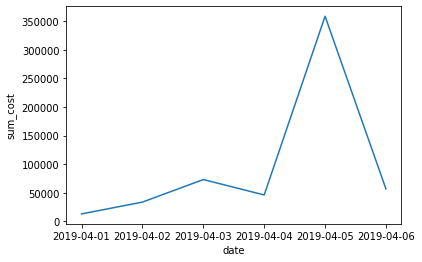

In [83]:
sns.lineplot(x='date', y='sum_cost', data=date_sum_cost)

# Аргумент hue принимает имя колонки, по значениям которой идёт разделение на цвета

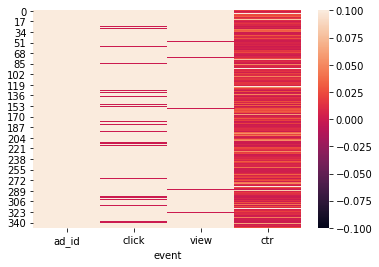

In [85]:
sns.heatmap(ads_data_by_ad_no_video)

In [79]:
date_sum_cost.sum_cost.sum()

581900.6778000002

In [155]:
# А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

In [80]:
ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'min'})

,ad_id,event,time
0,3,click,1554431096
1,3,view,1554422590
2,2132,click,1554477435
3,2132,view,1554424568
4,2276,click,1554424405
...,...,...,...
656,122042,view,1554422572
657,122063,click,1554280891
658,122063,view,1554249603
659,122086,click,1554163652


In [81]:
ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'min'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() \
    .query('click < view')

event,ad_id,click,view
27,16548,1.554336e+09,1.554336e+09
81,30939,1.554165e+09,1.554173e+09
138,40464,1.554164e+09,1.554164e+09
158,42007,1.554423e+09,1.554423e+09
185,44543,1.554336e+09,1.554337e+09
201,45436,1.554336e+09,1.554336e+09
324,119450,1.554336e+09,1.554336e+09


In [82]:
ads_data[ads_data.ad_id == 16548].sort_values('time')

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
512690,16548,1554336083,click,2019-04-04,CPM,0,722,16523,ios,196.6,53199,4133,2019-04-04 00:01:23
511482,16548,1554336278,view,2019-04-04,CPM,0,722,16523,android,196.6,53199,3736,2019-04-04 00:04:38
511439,16548,1554336352,view,2019-04-04,CPM,0,722,16523,android,196.6,53199,4968,2019-04-04 00:05:52
511438,16548,1554336352,view,2019-04-04,CPM,0,722,16523,ios,196.6,53199,4206,2019-04-04 00:05:52
511437,16548,1554336352,view,2019-04-04,CPM,0,722,16523,web,196.6,53199,3898,2019-04-04 00:05:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056433,16548,1554422265,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,3613,2019-04-04 23:57:45
2056432,16548,1554422265,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,6044,2019-04-04 23:57:45
2056461,16548,1554422308,view,2019-04-05,CPM,0,722,16523,ios,196.6,53199,5831,2019-04-04 23:58:28
2056652,16548,1554422338,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,2837,2019-04-04 23:58:58


In [89]:
import re # импотиртируем библиотеку для работы с регулярными выражениями, в чистом питоне их нет.


mail = 'vasya@yandex.ru'

pattern = re.compile('@([\w.]+)') 
# с помощью функции compile из модуля re создаём паттерн (образец), 
# который будем искать в тексте, и помещаем его в переменную pattern. 
pattern.findall(mail)


['yandex.ru']

In [90]:
text = '''We have several emails - vasya@yandex.ru, katya_ivanova@gmail.com,
sasha@karpov.courses.com and also masha@gmail.com'''

pattern.findall(text)


['yandex.ru', 'gmail.com', 'karpov.courses.com', 'gmail.com']

In [ ]:
'''
Метасимволы
Специальные символы для rе, обозначающие группу значений

\d — любая цифра (digits)
\D — всё, что угодно, кроме цифры
\s — любой пробельный символ (spaces)
\S — всё, что угодно, кроме пробельного символа
\w — любая буква, цифра или _ (words)
\W — всё, что угодно, кроме буквы, цифр или _
То есть нижний регистр — хотим это, верхний регистр — хотим не это.

Ещё есть:

. — любой символ

'''

In [91]:
# Тройки цифр

text = '+7-921-000-00-00 +7-981-555-55-55'

pattern = re.compile('\d\d\d')
pattern.findall(text)


['921', '000', '981', '555']

In [92]:
# Фрагменты из 4-х знаков, начинающиеся с 'в'

asimov = '''Робот не может причинить вред человеку или своим бездействием допустить, чтобы человеку был причинён вред.
Робот должен повиноваться всем приказам, которые даёт человек, кроме тех случаев, когда эти приказы противоречат Первому Закону.
Робот должен заботиться о своей безопасности в той мере, в которой это не противоречит Первому или Второму Законам.'''


pattern = re.compile('в...')
pattern.findall(asimov)


['вред',
 'веку',
 'воим',
 'вием',
 'веку',
 'вред',
 'вино',
 'вать',
 'всем',
 'век,',
 'в, к',
 'воре',
 'вому',
 'воей',
 'в то',
 'в ко',
 'воре',
 'вому']

In [93]:
# Группы
# Скобочки (()) имеют особое значение — они обозначают группы символов в паттерне. 
# Благодаря этому мы можем извлечь кусочки из заматчившегося паттерна. 
# Например, достанем только код из телефонного номера

text = '+7-921-000-00-00 +7-981-555-55-55'

pattern = re.compile('(\d\d\d)-(\d\d\d)')
pattern.findall(text)


[('921', '000'), ('981', '555')]

In [ ]:
'''
Квантификаторы — это символы, позволяющие специфицировать, 
сколько раз нужно повторить то, что идёт до них. Вот их виды:

* — сколько угодно раз (0 — бесконечность)
+ — 1 или больше раз
? — 0 или 1 раз (то есть или предыдущий символ будет, или нет)
{} — в скобочках можно указать точное количество или диапазон, 
читайте подробнее о них и других символах в документации.

'''

In [94]:
asimov = '''Робот не может причинить вред человеку или своим бездействием допустить, чтобы человеку был причинён вред.
Робот должен повиноваться всем приказам, которые даёт человек, кроме тех случаев, когда эти приказы противоречат Первому Закону.
Робот должен заботиться о своей безопасности в той мере, в которой это не противоречит Первому или Второму Законам.'''

# К примеру, отберём весь текст, начинающийся со слов человек

pattern = re.compile('человек.*')
pattern.findall(asimov)


['человеку или своим бездействием допустить, чтобы человеку был причинён вред.',
 'человек, кроме тех случаев, когда эти приказы противоречат Первому Закону.']

In [ ]:
'''
Эскапирование (экранирование)
Что делать, если хочется искать \d (то есть идущие друг за другом \ и d) или просто \?
Заэкранировать их ещё одним \! 
Однако, стоит помнить, что в питоне \ тоже специальный символ, 
поэтому придётся добавлять ещё один \ и в результате паттерн будет выглядеть захламлённым. 
Чтобы этого не происходило, используйте raw строки, то есть ставьте букву r перед строкой с паттерном.

'''

In [ ]:
'''
Строковые методы из str применяются к каждой ячейке колонки. 
Например, проверим, начинаются ли значения колонки name на 'A':

df.name.str.startswith('A')

Или перевод всех значений к верхнему регистру

df.name.str.upper()

Также мы можем делать срезы, например, возьмём первые 5 букв:

df.name.str[:5]

По аналогии со сплитом обычной строки, 
мы можем засплиттить строки в серии, и получить на каждую ячейку по списку. 

df['name'].str.split(',')

При работе с такими колонками по спискам 
можно индексироваться и слайситься также при помощи атрибута str:

df['name'].str.split(',').str[0]
'''

In [ ]:
'''
Чтобы извлечь данные из строк в пандас есть специальный метод — extract. 
Он принимает паттерн РЕ, позволяющий вытащить нужные куски из текста в отдельные колонки.

df['info'].str.extract('(?P<name>\w+), \((?P<data>.+)\)')

df['info'].str — обращаемся к атрибуту со строковыми методами
extract — вызываем метод, достающий части текста
(?P<name>\w+) — это именованная группа, она как группа, только к ней можно обращаться по имени.
                                  (?P...) — говорит питону, что это именованная группа
                                  <name> — имя группы, в данном случае name
                                  \w+ — матчит буквы/цифры/подчёркивания, которые встречаются один или больше раз подряд
, \( — запятая, пробел и скобочка, которые идут после первой группы.\, потому что символ скобки имеет специальное значение в РЕ.
(?P<data>.+) — другая именованная группа
               ?P — опять же, это идентификатор группы
                                 <data> — имя группы data
                                 .+ — берёт любой символ один или больше раз подряд
\) — скобочка после 2-й группы
Найдя в ячейке текст, подходящий под такое описание, extract вытащит его, разобьёт на указанные группы, и поместит в новые колонки с именами как в указанных группах. Данный паттерн не самый оптимальный, но не использует новых метасимволов.

extract возвращает новый датафрэйм с экстрагированным текстом.

'''

In [ ]:
'''

В пандасе есть удобный метод отбора колонок или строк по их названию — filter. 
Кроме строк он также может работать с регэкспами, что позволяет гибко отбирать колонки.

pd.DataFrame.filter(items/like/regex, axis)

items — принимает список с названиями колонок или строк, особой разницы по сравнению с loc нет

like — принимает строку и возвращает все колонки, 
где в названии содержится строка, переданная в like

regex — принимает строку, означающую паттерн РЕ возвращает все колонки с названиями, 
матчимящимися на паттерн

axis — параметр для обозначения того, отбираем мы колонки или строки, 
принимает 'columns' или 'index', по умолчанию фильтрует колонки

'''

In [95]:
path_to_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-kazantseva-40/Lesson3/3_taxi_peru.csv'

In [96]:
taxi = pd.read_csv(path_to_file, sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [97]:
taxi.filter(like='id')

,journey_id,user_id,driver_id,taxi_id,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,5.0
...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,5.0


In [98]:
taxi.filter(regex='_id')

,journey_id,user_id,driver_id,taxi_id
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69
...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c
